In [1]:
from copulae1 import *
from toolbox import *
import os

In [274]:
v1 = pd.read_csv('../processed_data/coingecko_future_v1/train/10.csv')
print(len(v1))

300


In [275]:
v5 = pd.read_csv('../processed_data/coingecko_future_v5/train/46.csv')
print(len(v5))

300


In [276]:
print(v1.iloc[0:2,1:], v1.iloc[-3:-1,1:])

         Date  bitcoin price   Close  log return bitcoin  log return future
0  2019-10-11    8328.545273  8465.0           -0.025490          -0.027958
1  2019-10-10    8543.565464  8705.0            0.002356          -0.004013            Date  bitcoin price   Close  log return bitcoin  log return future
297  2018-08-08    6306.392520  6330.0           -0.076259          -0.097032
298  2018-08-07    6806.123136  6975.0           -0.009873           0.007194


In [277]:
print(v5.iloc[0:2,1:], v5.iloc[-3:-1,1:])

         Date  bitcoin price   Close  log return bitcoin  log return future
0  2019-10-11    8328.545273  8465.0           -0.025490          -0.027958
1  2019-10-10    8543.565464  8705.0            0.002356          -0.004013            Date  bitcoin price   Close  log return bitcoin  log return future
297  2018-08-08    6306.392520  6330.0           -0.076259          -0.097032
298  2018-08-07    6806.123136  6975.0           -0.009873           0.007194


In [14]:
para1 = pd.read_json('../results/coingecko_future_v1/MM/parameters.json')

In [43]:
para1.loc[:,'10.csv']

Clayton                                     {'theta': 52.8099180598}
Frank                                       {'theta': 38.2435110122}
Gauss Mix Indep    {'rho': 0.9949729097000001, 'p': 0.87103102350...
Gaussian                                       {'rho': 0.9629460318}
Gumbel                                        {'theta': 6.220406518}
Plackett                                   {'theta': 316.0334926055}
t_Copula                            {'rho': 0.9400370509, 'nu': 2.0}
t_Copula_Capped                     {'rho': 0.9516419344, 'nu': 4.0}
Name: 10.csv, dtype: object

In [16]:
para5 = pd.read_json('../results/coingecko_future_v5/MM/parameters.json')

In [35]:
data_name = "coingecko_future_v1"
data_path = "../processed_data/"+data_name+"/"
ls = os.listdir(data_path + 'train/')
date_range_arr = []
for i, file in enumerate(ls):
	train = pd.read_csv(data_path + 'train/' + file)
	date_range = train.Date.iloc[-1] + ' to ' + train.Date.iloc[0]
	date_range_arr.append(date_range)

In [33]:
files = list(para1.columns)
date_range_arr = []
for file in files:
    train = pd.read_csv(data_path + 'train/' + file)
    date_range = train.Date.iloc[-1] + ' to ' + train.Date.iloc[0]
    date_range_arr.append(date_range)

In [71]:
OHR5 = pd.read_hdf('../results/coingecko_future_v5/MM/best_h.h5')

In [75]:
OHR5.loc[:,'46.csv']

,Variance,ERM k=10,ES q=0.01,ES q=0.05,VaR q=0.01,VaR q=0.05
Gaussian,0.875098,0.882617,0.834668,0.878223,0.875098,0.924512
t_Copula,0.853516,0.860059,0.757617,0.827637,0.812305,0.900000
t_Copula_Capped,0.867676,0.869336,0.821191,0.851562,0.829492,0.912988
Clayton,0.883691,0.861621,0.705176,0.818262,0.781738,0.956152
Frank,0.579687,0.506543,0.515820,0.479199,0.485937,1.058008
Gumbel,0.873242,0.954590,0.926855,0.976953,1.042969,0.969531
Plackett,0.860352,0.887988,0.756055,0.845312,0.796875,0.933203
Gauss Mix Indep,0.790430,0.869922,0.435840,0.738867,0.507031,0.913477


In [73]:
OHR1 = pd.read_hdf('../results/coingecko_future_v1/MM/best_h.h5')

In [76]:
OHR1.loc[:,'10.csv']

,Variance,ERM k=10,ES q=0.01,ES q=0.05,ES q=0.10,VaR q=0.01,VaR q=0.05,VaR q=0.10
Gaussian,0.864941,0.879785,0.829102,0.874707,0.888086,0.856055,0.932031,0.906641
t_Copula,0.844336,0.858398,0.763770,0.825195,0.858984,0.815332,0.901953,0.903906
t_Copula_Capped,0.857422,0.868555,0.816992,0.850195,0.873145,0.828711,0.897852,0.910742
Clayton,0.875684,0.872070,0.697852,0.825000,0.869336,0.776953,0.948145,1.003125
Frank,0.586719,0.518262,0.528613,0.489941,0.499414,0.497070,1.078320,1.019043
Gumbel,0.863867,0.946875,0.915918,0.968359,0.959668,1.041016,0.966895,0.926562
Plackett,0.850293,0.886133,0.756055,0.843750,0.889258,0.796191,0.929199,0.962109
Gauss Mix Indep,0.781543,0.870703,0.431445,0.747852,0.864551,0.505566,0.909375,0.968066


In [9]:
from KDEs import *
data = pd.read_csv('../processed_data/coingecko_future_v1/train/0.csv')
btc = data.loc[:,'log return bitcoin']
future = data.loc[:,'log return future']
KDE_btc = KDE(btc, 'Gaussian')
KDE_future = KDE(future, 'Gaussian')

In [19]:
C = t_Copula(para1.loc['t_Copula','10.csv'], KDE_btc, KDE_future, nu_lowerbound=2)
optimize_h(C, [10], [0.01,0.05], [0.01,0.05])

Optimization terminated successfully.
         Current function value: 0.000222
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.020267
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.065212
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.033655
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.039557
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: 0.017395
         Iterations: 14
         Function evaluations: 29


[0.8557617187499998,
 0.8410156249999999,
 0.9197265625,
 0.8687499999999999,
 0.9368164062499998,
 0.7748046874999999]

In [22]:
C = t_Copula(para1.loc['t_Copula','10.csv'], KDE_btc, KDE_future, nu_lowerbound=2)
optimize_h(C, [10], [0.01,0.05], [0.01,0.05])

Optimization terminated successfully.
         Current function value: 0.000222
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.020267
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.065212
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.033655
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.039557
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: 0.017395
         Iterations: 14
         Function evaluations: 29


[0.8557617187499998,
 0.8410156249999999,
 0.9197265625,
 0.8687499999999999,
 0.9368164062499998,
 0.7748046874999999]

In [68]:
h_arr = []
for i, copula in enumerate(list(OHR5.index)):
    h = OHR5.iloc[i:i+1,:].melt()
    h.columns = ['file', 'risk measure', 'OHR']
    h.loc[:,'copula'] = copula
    h_arr.append(h)
h = pd.concat(h_arr)

In [33]:
test = pd.read_csv('../processed_data/coingecko_future_v5/test/1.csv')
test

,Unnamed: 0,Date,bitcoin price,Close,log return bitcoin,log return future
0,5,2021-01-27,31038.167807,31905.0,-0.031028,-0.020475
1,6,2021-01-26,32016.318284,32565.0,-0.012835,-0.049280
2,7,2021-01-25,32429.912048,34210.0,-0.032341,-0.001606
3,8,2021-01-22,33495.880668,34265.0,0.068315,0.050733
4,9,2021-01-21,31284.024401,32570.0,-0.110154,-0.096649
5,10,2021-01-20,34927.060093,35875.0,-0.041842,-0.046298
6,11,2021-01-19,36419.483281,37575.0,0.006850,0.028068
7,12,2021-01-15,36170.880330,36535.0,-0.068624,-0.103525
8,13,2021-01-14,38740.226904,40520.0,0.031658,0.081998
9,14,2021-01-13,37532.981902,37330.0,0.075784,0.052521


In [38]:
data  = pd.read_csv('../data/btc future and reference rate/coingecko_future.csv')
data.Date = pd.to_datetime(data.Date)

In [49]:
toPlot = data.loc[data.Date > '2019-09-01']
toPlot = toPlot.loc[toPlot.Date < '2019-10-01']

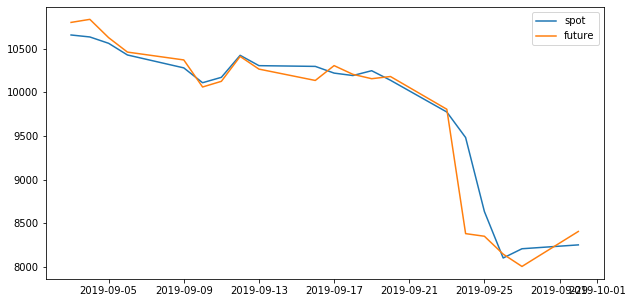

In [51]:
plt.figure(figsize=(10,5))
plt.plot(toPlot.Date, toPlot.loc[:,'bitcoin price'], label='spot')
plt.plot(toPlot.Date, toPlot.Close, label='future')
plt.legend()

In [111]:
i = 54

In [112]:
test = pd.read_csv('../processed_data/coingecko_future_v5/test/%s.csv'%str(i))
test.tail()

,Unnamed: 0,Date,bitcoin price,Close,log return bitcoin,log return future
95,365,2019-08-22,10111.460266,10275.0,0.002106,0.006346
96,366,2019-08-21,10090.188837,10210.0,-0.068070,-0.060337
97,367,2019-08-20,10800.939830,10845.0,0.008204,0.001384
98,368,2019-08-19,10712.689131,10830.0,0.026051,0.019110
99,369,2019-08-16,10437.216342,10625.0,0.009652,0.036908


In [113]:
stats.kendalltau(test.loc[:,'log return bitcoin'], test.loc[:,'log return future'])

KendalltauResult(correlation=0.7061319361215105, pvalue=2.2661329571138766e-25)

In [114]:
train = pd.read_csv('../processed_data/coingecko_future_v5/train/%s.csv'%str(i))
stats.kendalltau(train.loc[:,'log return bitcoin'], train.loc[:,'log return future'])

KendalltauResult(correlation=0.7496152889323255, pvalue=1.8615632161677078e-83)

In [115]:
train.head()

,Unnamed: 0,Date,bitcoin price,Close,log return bitcoin,log return future
0,370,2019-08-15,10336.963924,10240.0,0.013129,-0.001951
1,371,2019-08-14,10202.137804,10260.0,-0.066025,-0.077791
2,372,2019-08-13,10898.472159,11090.0,-0.044405,-0.052690
3,373,2019-08-12,11393.326836,11690.0,-0.045005,-0.033645
4,374,2019-08-09,11917.801128,12090.0,0.015356,0.022163


In [130]:
C = Frank({'theta':12}, stats.uniform, stats.uniform)

In [142]:
s = C.sample(10000000)
print('sample tau',stats.kendalltau(s[:,0],s[:,1])[0], 
      '\nCopula implied tau', C.tau())

sample tau 0.7122669466434717 
Copula implied tau 0.7123570608847691


In [149]:
C._lambda(0.01)

0.10724603680266236

In [150]:
empirical_lambda(s[:,0], s[:,1], 0.01)

0.10719

In [2]:
data = pd.read_csv('../data/btc future and reference rate/coingecko_future.csv')
rs = data.loc[:, 'log return bitcoin']
rf = data.loc[:, 'log return future']

In [194]:
def hedging_effectiveness2(rm, rs, rf, h):
    rh = rs - h*rf
    if rm == 'ERM k=10':
        return(1-ERM_estimate_trapezoidal(10, rh)/ERM_estimate_trapezoidal(10, rs))

    elif rm == 'ES q=0.01':
        return(1-ES(0.01, rh)/ES(0.01, rs))

    elif rm == 'ES q=0.05':
        return(1-ES(0.05, rh)/ES(0.05, rs))

    elif rm == 'VaR q=0.01':
        return(1-VaR(0.01, rh)/VaR(0.01, rs))

    elif rm == 'VaR q=0.05':
        return(1-VaR(0.05, rh)/VaR(0.05, rs))

    elif rm == 'Variance':
        return(1-Variance(rh)/Variance(rs))

In [197]:
h_arr[np.argmax(HE_arr)]

0.888888888888889

In [217]:
rs_c = rs.copy()
rf_c = rf.copy()
rs_c.loc[678] = -0.5
rf_c.loc[678] = 0.5
rs_c.loc[679] = 0.5
rf_c.loc[679] = -0.5

0.8848848848848849 0.8528528528528528


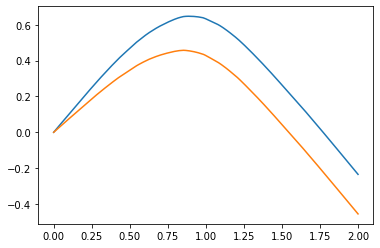

In [218]:
rm = 'ES q=0.05'
h_arr = np.linspace(0,2,1000)

HE_arr = []
HE_arr_c = []
for h in h_arr: 
    HE_arr.append(hedging_effectiveness2(rm, rs, rf, h))
    HE_arr_c.append(hedging_effectiveness2(rm, rs_c, rf_c, h))
    
plt.plot(h_arr, HE_arr)
plt.plot(h_arr, HE_arr_c)
print(h_arr[np.argmax(HE_arr)], h_arr[np.argmax(HE_arr_c)])

In [71]:
data.loc[:,'log return bitcoin'][300:600]

300   -0.035728
301   -0.063203
302   -0.002318
303   -0.013810
304   -0.028113
305   -0.022375
306   -0.011713
307    0.000323
308    0.001253
309   -0.014833
310   -0.037671
311   -0.009656
312   -0.003116
313   -0.006093
314    0.016585
315    0.009129
316   -0.000105
317   -0.026336
318   -0.003337
319    0.095200
320    0.141331
321    0.001494
322   -0.085995
323   -0.013859
324    0.034065
325   -0.014938
326    0.010414
327   -0.023001
328   -0.017561
329   -0.001847
         ...   
570   -0.021790
571    0.001357
572   -0.004912
573    0.003609
574   -0.007508
575    0.004519
576   -0.000774
577   -0.020416
578    0.001054
579    0.004780
580    0.045898
581    0.003761
582   -0.046207
583   -0.009578
584   -0.004871
585    0.011044
586    0.005574
587    0.011259
588   -0.013015
589   -0.003166
590   -0.008133
591   -0.011279
592    0.036741
593    0.011718
594   -0.030435
595   -0.023612
596    0.048821
597    0.001107
598    0.014787
599    0.012378
Name: log return bitcoin

In [79]:
from copulae1 import *
from KDEs import *
from toolbox import *
brr = np.array(data.loc[:,'log return bitcoin'][300:600])
btc = np.array(data.loc[:,'log return future'][300:600])

brr_testing = np.array(data.loc[:,'log return bitcoin'][:300])
btc_testing = np.array(data.loc[:,'log return future'][:300])

kde_brr = KDE(brr, 'Gaussian')
kde_btc = KDE(btc, 'Gaussian')
u = ECDF(brr)(brr)
v = ECDF(btc)(btc)

In [82]:
h_arr = np.linspace(0.5,1.5,200)

loss = []
for h in h_arr:
    rh = brr_testing - h*btc_testing
    loss.append(Variance(rh))


In [83]:
C = t_Copula({'rho':0.8, 'nu':2}, kde_brr, kde_btc, 2)
C.canonical_calibrate(u,v)
h_t_copula = optimize_h(C, [],[],[])

Optimization terminated successfully.
         Current function value: -1.022092
         Iterations: 114
         Function evaluations: 214
Optimization terminated successfully.
         Current function value: 0.000339
         Iterations: 13
         Function evaluations: 26


In [84]:
C = Gaussian({'rho':0.8}, kde_brr, kde_btc)
C.canonical_calibrate(u,v)
h_Gaussian = optimize_h(C, [],[],[])

Optimization terminated successfully.
         Current function value: -0.910075
         Iterations: 32
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000390
         Iterations: 13
         Function evaluations: 26


In [85]:
C = Frank({'theta':0.8}, kde_brr, kde_btc)
C.canonical_calibrate(u,v)
h_Frank = optimize_h(C, [],[],[])

Optimization terminated successfully.
         Current function value: -0.875605
         Iterations: 46
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: 0.000834
         Iterations: 14
         Function evaluations: 28


In [86]:
C = Gaussian_Mix_Independent({'rho':0.8, 'p':0.9}, kde_brr, kde_btc)
C.canonical_calibrate(u,v)
h_GMI = optimize_h(C, [],[],[])

Optimization terminated successfully.
         Current function value: -0.985866
         Iterations: 72
         Function evaluations: 152
Optimization terminated successfully.
         Current function value: 0.000613
         Iterations: 13
         Function evaluations: 26


In [89]:
C = Plackett({'theta':10}, kde_brr, kde_btc)
C.canonical_calibrate(u,v)
h_Plackett = optimize_h(C, [],[],[])

Optimization terminated successfully.
         Current function value: -1.005859
         Iterations: 46
         Function evaluations: 101
Optimization terminated successfully.
         Current function value: 0.000578
         Iterations: 13
         Function evaluations: 26


In [90]:
C = Gumbel({'theta':10}, kde_brr, kde_btc)
C.canonical_calibrate(u,v)
h_Gumbel= optimize_h(C, [],[],[])

Optimization terminated successfully.
         Current function value: -0.969639
         Iterations: 39
         Function evaluations: 88


/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/toolbox.py:288: RuntimeWarning: invalid value encountered in power
/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/toolbox.py:289: RuntimeWarning: invalid value encountered in power


Optimization terminated successfully.
         Current function value: 0.000389
         Iterations: 13
         Function evaluations: 26


In [92]:
C = Clayton({'theta':10}, kde_brr, kde_btc)
C.canonical_calibrate(u,v)
h_Clayton =  optimize_h(C, [],[],[])

Optimization terminated successfully.
         Current function value: -0.788689
         Iterations: 39
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 0.000903
         Iterations: 14
         Function evaluations: 28


In [87]:
print(h_arr[np.argmin(loss)], h_Gaussian, h_Frank, )

0.8969849246231156 [0.8189453124999999] [0.6971679687499996]


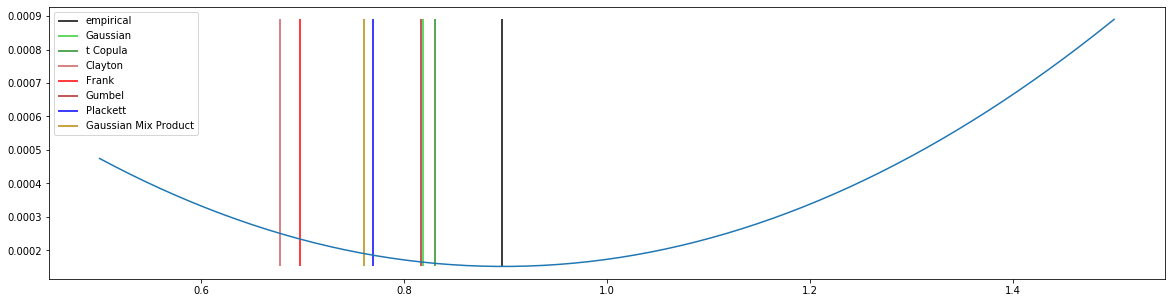

In [97]:
plt.figure(figsize=(20,5))
plt.plot(h_arr, loss)
plt.vlines(x=h_arr[np.argmin(loss)],ymin=np.min(loss), ymax=np.max(loss),label='empirical', color='black')
plt.vlines(x=h_Gaussian[0], ymin=np.min(loss), ymax=np.max(loss), label='Gaussian', color='limegreen')
plt.vlines(x=h_t_copula, ymin=np.min(loss), ymax=np.max(loss), label='t Copula', color='forestgreen')
plt.vlines(x=h_Clayton, ymin=np.min(loss), ymax=np.max(loss), label='Clayton', color='indianred')
plt.vlines(x=h_Frank, ymin=np.min(loss), ymax=np.max(loss), label='Frank', color='red')
plt.vlines(x=h_Gumbel, ymin=np.min(loss), ymax=np.max(loss), label='Gumbel', color='firebrick')
plt.vlines(x=h_Plackett, ymin=np.min(loss), ymax=np.max(loss), label='Plackett', color='blue')
plt.vlines(x=h_GMI, ymin=np.min(loss), ymax=np.max(loss), label='Gaussian Mix Product', color='darkgoldenrod')
plt.legend()